In [1]:
# General import
import numpy as np
import os
from PIL import Image
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt
%matplotlib inline
# Local import
from Codes.dataprocess import DataGen
from Codes.dataprocess import Export_ep
from Codes.alternate import AlternatingBD
from Codes.display import Display_ker
from Codes.display import Display_im
from Codes.display import Display_epd
from Codes.simplex import Simplex
from Codes.fbstep import Energy

# Minimisation alternée

Approche variationnelle pour la reconstruction d'un noyau régulier $K$, minimisation de l'énergie,
$$
E_1(K) = \frac{1}{2} \| g - K * u\|^2 + \frac{1}{2} \alpha \| D K \|^2
\; .
$$ 
On peut considérer que le noyau appartien a l'ensemble des simplexe (ensemble des noyaux à coefficient positif dont la somme vaut 1).
On sonsidere alors l'énergie
$$
E_1'(K) = \frac{1}{2} \| g - K * u\|^2 + \frac{1}{2} \alpha \| D K \|^2 + \Sigma(K)
\; .
$$ 


Approche variationnelle pour la reconstruction de l'image $u$, avec régularisation TV,
$$
E_2(u) = \frac{1}{2} \| g - K * u\|^2 +  \mu \text{TV} (u)
\; .
$$

Dans la minimisation alternée, on considere d'abord la minimisation de $E_2$ 
pour reconstruire l'image $u$, puis de $E_1$ (ou éventuellement $E_1'$) pour reconstruire le noyau $K$.

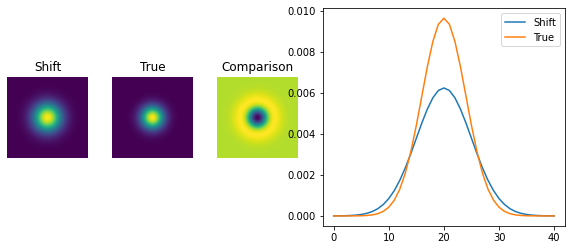

Erreur |Shift - True|/ |True| : 0.2811 


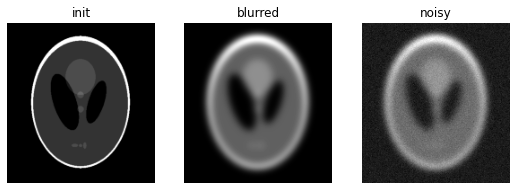

Erreur blurred |x_blurr- x_true|_2 :0.5683
Erreur |x_noisy - x_true|_2 :0.5735


In [2]:
K, K_shift, x_i, x_b, x_o1 = DataGen()

## Initialisation noyau proche - pas de bruit

In [3]:
alpha = 500
mu    = 0.005
K_in  = K_shift.copy()
x_in  = x_o1
K_out,x_out,Ep12,Ed12 = AlternatingBD(K_in,x_in,x_o1,alpha,mu,\
                  alte=4,niter_TV=1500,niter_Lap=500,\
                  proj_simplex=True,verbose=False)

Energie =  9.051234334570678
Energie =  8.279994235814183
Energie =  7.583785056331768
Energie =  7.219066841590919
Energie =  6.849256559498702
Energie =  6.675972826317707
Energie =  6.491225359652109
Energie =  6.412651018945942
Final energy : 6.412651018945942


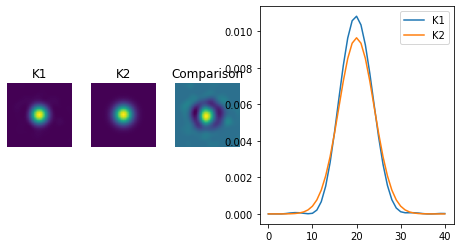

Erreur |K1 - K2|/ |K2| : 0.1219 


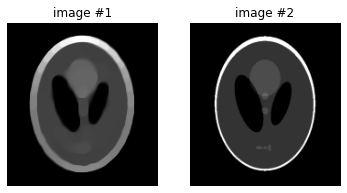

Erreur |im1 - im2|/|im2| :0.4932


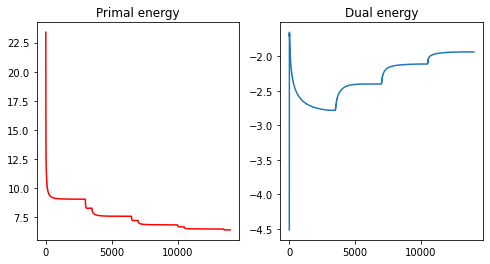

In [4]:
# Display_ker(K_out,K_in,mysize=(8,4))
Display_ker(K_out,K,mysize=(8,4))
Display_im(x_out,x_i,mysize=(6,3))
Display_epd(Ep12,Ed12)

In [5]:
# Export
import imageio
imageio.imwrite('alt_b.jpg', x_out)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


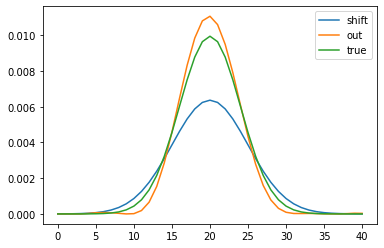

In [6]:
plt.plot(K_shift[20,:],label='shift')
plt.plot(K_out[20,:],label='out')
plt.plot(K[20,:],label='true')
plt.legend()

## Initialisation proche - bruit 1%

In [7]:
alpha = 500
mu    = 0.005
K_in  = K_shift.copy()
x_in  = x_o1
K_out2,x_out2,Ep13,Ed13 = AlternatingBD(K_in,x_in,x_o1,alpha,mu,\
                  alte=4,niter_TV=1500,niter_Lap=1500,\
                  proj_simplex=True,verbose=False)

Energie =  9.051234334570678
Energie =  8.279587766746692
Energie =  7.575936279292614
Energie =  7.2106194644807236
Energie =  6.842470656993669
Energie =  6.671550838916286
Energie =  6.4861681761077605
Energie =  6.408833767539676
Final energy : 6.408833767539676


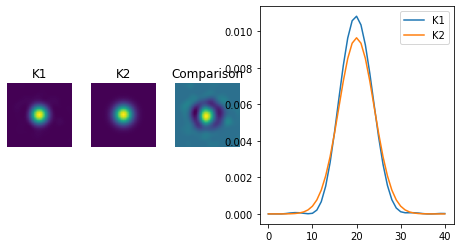

Erreur |K1 - K2|/ |K2| : 0.1219 


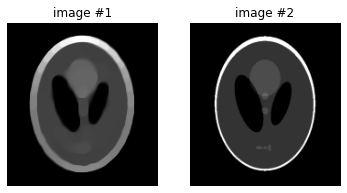

Erreur |im1 - im2|/|im2| :0.4932


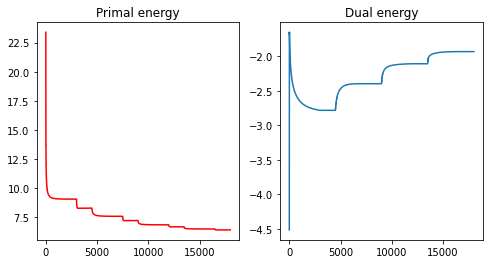

In [8]:
Display_ker(K_out,K,mysize=(8,4))
Display_im(x_out,x_i,mysize=(6,3))
Display_epd(Ep13,Ed13)

In [9]:
imageio.imwrite('alt_o.jpg', x_out2)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


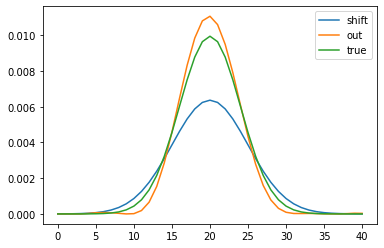

In [10]:
from Codes.simplex import Simplex
plt.plot(K_shift[20,:],label='shift')
plt.plot(K_out[20,:],label='out')
plt.plot(K[20,:],label='true')
plt.legend()